## Building CNN classification model on Devanagari Dataset which has 46 different classes.

In [1]:
# library imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os,glob
import cv2

2021-07-18 15:33:38.576118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 15:33:38.576154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Collecting all files in list
base_path = './CSV/DevanagariHandwrittenCharacterDataset/'
image_dir = '*/*/*.png'
all_files_limit = glob.glob(base_path+image_dir)
all_files = all_files_limit[:5000]
len(all_files)

5000

In [3]:
# Shuffle all images in collected list
np.random.shuffle(all_files)  

In [4]:
# Creating list for each image and their label
image_size = 200
X = [] 
Y =[]
for image_path in all_files:
    image_label = image_path.split('/')[-2].split('_')[-1]
    image_array = cv2.imread(image_path) 
    image_array = cv2.resize(image_array , (image_size  , image_size) ) 
    X.append(image_array)
    Y.append(image_label)

(<matplotlib.image.AxesImage at 0x7f8e210385d0>, 'gha')

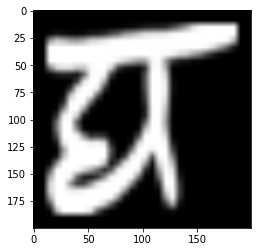

In [5]:
# Verify the mapping between X and Y dataset
plt.imshow(X[0]),Y[0]

In [6]:
# Converting X to array and performing normalization of pixels
X = np.array(X)
X = X/255 

In [7]:
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [8]:
# Creating unique index for unique categories
labels = np.unique(Y)
label_relations = {}  # Mapping categories to indices
label_verification = {} # Mapping indices to categories
for i in range(len(labels)):
    y=i
    label_relations[labels[i]] = y
    label_verification[y] = labels[i]

In [9]:
label_relations,label_verification

({'2': 0,
  '9': 1,
  'adna': 2,
  'bha': 3,
  'cha': 4,
  'daa': 5,
  'ga': 6,
  'gha': 7,
  'gya': 8,
  'kna': 9,
  'patalosaw': 10,
  'petchiryakha': 11,
  'pha': 12,
  'ra': 13,
  'taamatar': 14,
  'tha': 15,
  'yaw': 16},
 {0: '2',
  1: '9',
  2: 'adna',
  3: 'bha',
  4: 'cha',
  5: 'daa',
  6: 'ga',
  7: 'gha',
  8: 'gya',
  9: 'kna',
  10: 'patalosaw',
  11: 'petchiryakha',
  12: 'pha',
  13: 'ra',
  14: 'taamatar',
  15: 'tha',
  16: 'yaw'})

In [10]:
Y

['gha',
 'tha',
 'patalosaw',
 'ra',
 'taamatar',
 'tha',
 'patalosaw',
 'cha',
 'taamatar',
 'ga',
 'daa',
 'daa',
 'petchiryakha',
 'ra',
 'taamatar',
 'ra',
 'ga',
 'yaw',
 'bha',
 '9',
 '2',
 'ga',
 'ra',
 'daa',
 'gha',
 'gya',
 'bha',
 'petchiryakha',
 'tha',
 'pha',
 'kna',
 'taamatar',
 'yaw',
 'taamatar',
 'tha',
 'taamatar',
 'gha',
 'gya',
 'patalosaw',
 'petchiryakha',
 'petchiryakha',
 '2',
 'cha',
 'ra',
 'yaw',
 'kna',
 'gha',
 'gya',
 'kna',
 'patalosaw',
 'bha',
 'bha',
 'yaw',
 'gya',
 'gha',
 'ga',
 'patalosaw',
 'adna',
 'tha',
 '9',
 'ga',
 'bha',
 'daa',
 'petchiryakha',
 'ra',
 '9',
 'cha',
 'daa',
 'ra',
 'daa',
 'petchiryakha',
 'yaw',
 'pha',
 'tha',
 'tha',
 'ra',
 'cha',
 'petchiryakha',
 'gha',
 '2',
 'bha',
 'ga',
 'yaw',
 'cha',
 '2',
 'cha',
 'cha',
 'yaw',
 'bha',
 'gya',
 'taamatar',
 '2',
 'bha',
 'ra',
 'pha',
 'pha',
 '9',
 'adna',
 'patalosaw',
 'ga',
 'tha',
 'adna',
 'bha',
 'gha',
 '9',
 'pha',
 'pha',
 'yaw',
 'tha',
 'petchiryakha',
 'daa',
 '

In [11]:
# Converting categorical Y into respective index
new_Y = []
for label in Y:
    new_Y.append(label_relations[label])

In [12]:
# Converting Y index list to array
Y = np.array(new_Y)

In [13]:
Y

array([ 7, 15, 10, ..., 10,  0, 15])

In [14]:
# Performing train test split (80%-20%)
test_train_split_param = .8
slice_index = int(len(X)*test_train_split_param)
train_x = X[:slice_index]
train_y = Y[:slice_index]
test_x = X[slice_index:]
test_y = Y[slice_index:]

In [15]:
# Setting up the layers in the model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu'  ,   ))
model.add(MaxPool2D(pool_size =(2,2)))


model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = train_x.shape[1:]))
model.add(Dense(len(labels) , activation= 'softmax'))

2021-07-18 15:33:43.391540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-18 15:33:43.391569: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-18 15:33:43.391585: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mubuntu): /proc/driver/nvidia/version does not exist
2021-07-18 15:33:43.391829: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Compliling the model with Adam optimizer
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [17]:
# Training the model
model.fit(train_x , train_y , epochs = 2);

2021-07-18 15:33:43.850473: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1920000000 exceeds 10% of free system memory.
2021-07-18 15:33:44.988929: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-18 15:33:44.991113: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


Epoch 1/2
125/125 [==============================] - 66s 389ms/step - loss: 1.9275 - accuracy: 0.4573
Epoch 2/2
125/125 [==============================] - 93s 746ms/step - loss: 0.4009 - accuracy: 0.8809


In [18]:
# Making the prediction
pred  = model.predict_classes( test_x) ;

/home/adarsh/projects/new_project/kaggle/Kaggle-competitions/Character_Recognition/jupyter/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
pip install scikit-learn

     |████████████████████████████████| 22.3 MB 819 kB/s eta 0:00:01     |██████████████████████          | 15.3 MB 2.5 MB/s eta 0:00:03
     |████████████████████████████████| 303 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Checking the accuracy using Confusion Matrix
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred , test_y )
print(tab1)

[[49  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0 47  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  3  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0 45  0  0  1  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  2  0 42  0  1  0  0  0  3  1  0  0  0  0  2]
 [ 0  0  0  0  0 53  0  0  0  4  0  0  0  0  2  0  0]
 [ 0  0  3  0  0  0 51  0  0  0  1  1  0  0  0  0  3]
 [ 0  0  5  1  6  2  1 53  0  1  1  3  0  0  0  6  5]
 [ 0  0  0  1  0  0  3  0 53  2  2  0  0  0  1  1  0]
 [ 0  0  0  0  0  2  1  0  1 37  0  0  0  0  0  0  1]
 [ 2  0  0  1  1  1  2  1  1  1 63  3  0  0  4  3  1]
 [ 1  0  1  0  0  0  0  1  0  1  0 39  0  0  0  1  1]
 [ 0  0  1  6  0  1  0  0  0  1  0  4 61  0  0  0  2]
 [ 1  1  0  0  0  3  0  0  0  0  1  0  0 54  7  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 51  0  0]
 [ 0  0  0  2  3  0  0  2  0  0  0  1  0  0  0 41  9]
 [ 0  0  0  0  2  0  2  1  0  1  1  0  0  0  0  3 38]]


(<matplotlib.image.AxesImage at 0x7f8d40899990>, 'yaw')

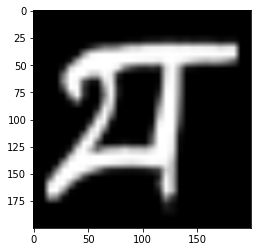

In [22]:
plt.imshow(test_x[3]),label_verification[pred[3]]

In [23]:
# Calculating the accuracy of the model
tab1.diagonal().sum() * 100/ tab1.sum()

83.1

In [24]:
from sklearn.metrics import f1_score

In [25]:
# calculating f1 score to access the model performance
f1_score(test_y, pred,average='weighted')*100

83.01253387608398

In [35]:
model.save('../model.h5');

In [38]:
label_verification

{0: '2',
 1: '9',
 2: 'adna',
 3: 'bha',
 4: 'cha',
 5: 'daa',
 6: 'ga',
 7: 'gha',
 8: 'gya',
 9: 'kna',
 10: 'patalosaw',
 11: 'petchiryakha',
 12: 'pha',
 13: 'ra',
 14: 'taamatar',
 15: 'tha',
 16: 'yaw'}